# Lab: Building Simple RAG Using Langchain

In this lab, we will build a **Retrieval-Augmented Generation (RAG)** system that combines information retrieval and text generation to process large documents, such as legal contracts. The RAG system leverages **FAISS** for efficient similarity search and **Hugging Face's generative models** (like GPT-2) for synthesizing human-like answers. By embedding the document content and indexing it with FAISS, we can quickly retrieve relevant sections of text and generate contextually accurate responses to specific queries.

*The main objective of this system is to enable automated document analysis, allowing users to query large legal documents and get detailed, relevant, and concise answers without manually reading through the entire document.*

This approach significantly improves efficiency for industries like law, where processing vast amounts of textual data is crucial.

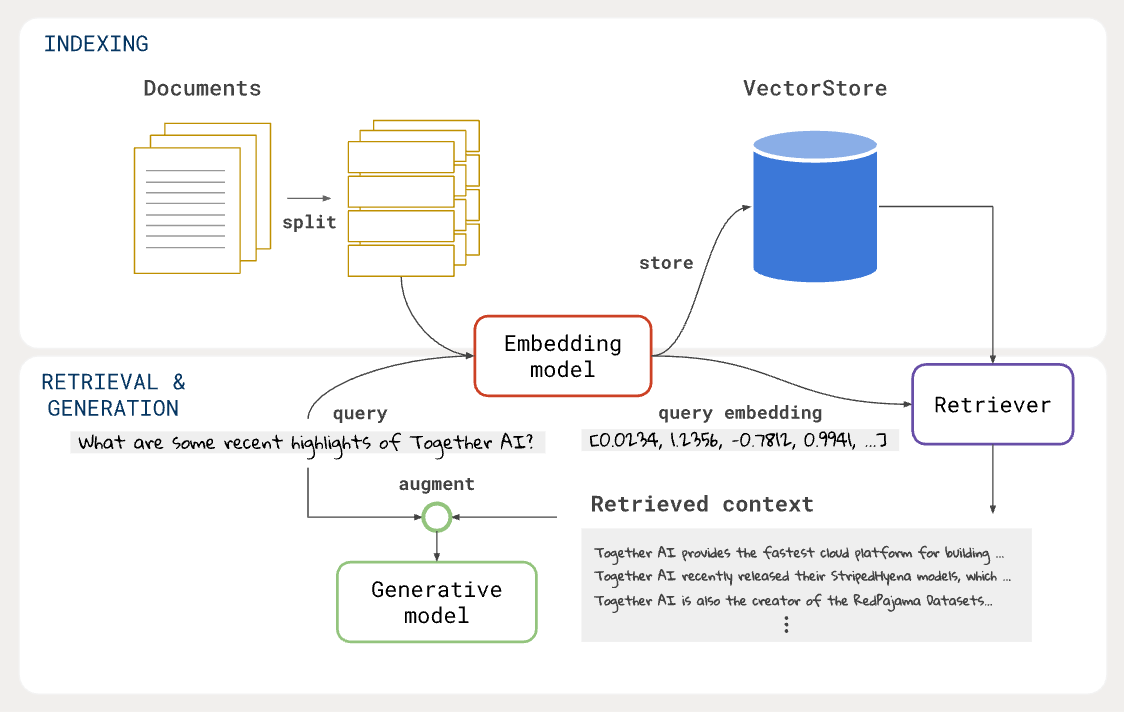

# Step 1: Install Required Libraries

In this step, we install the necessary libraries that will be used throughout the lab. **LangChain** is essential for orchestrating the RAG system, integrating document processing and retrieval with language models.

**FAISS** is used to index and search the document embeddings efficiently, which allows us to quickly retrieve relevant content. **Transformers** provides access to pre-trained language models, and **Sentence-Transformers** allows us to generate meaningful sentence embeddings.

 These libraries are fundamental to building a scalable and efficient RAG system.

In [ ]:
!pip install langchain
!pip install faiss-cpu
!pip install transformers
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

# Step 2: Import Required Libraries

1. The commands update **LangChain** to its latest version and install the **LangChain Community edition**, which provides additional features and integrations for building AI applications like document retrieval and text generation.

In [ ]:
!pip install --upgrade langchain
!pip install langchain-community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00


2. This code imports libraries for building a **RAG** system, including **LangChain** for document retrieval and generation, FAISS for similarity search, and **SentenceTransformer** for generating embeddings. It also uses **TextLoader** to load documents and **RecursiveCharacterTextSplitter** to split large texts into chunks for efficient processing.

In [ ]:
import os
from langchain.chains import RetrievalQA
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer


3. To verify that **LangChain** and its dependencies are installed correctly, you can run the below code. This will **print the version** of LangChain you have installed. Ensure it is up to date *(e.g., version 0.3.x or higher).*

In [ ]:
import langchain
print(langchain.__version__)


0.3.27


# Step 3: Load and Preprocess Data (Documents)


1. In this step, the **document** (such as a legal contract) is uploaded to Google Colab using the files.upload() function, which opens a dialog for selecting the file. This is essential to bring the document into the environment for further processing, and it ensures that the file is **accessible** for loading and manipulation.

Here, we will assume you have a text file with your legal documents. If you Not then **Download the Document form Here:**

[legal_documents.txt](https://github.com/k21academyuk/Agentic-AI/blob/main/legal_documents.txt)

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will open the file upload dialog


Saving legal_documents.txt to legal_documents.txt


2. After uploading the file, you can **verify the file's existence** using the os module:


In [ ]:
import os
print(os.listdir())  # This will show the files in the current directory


['.config', 'legal_documents.txt', 'sample_data']


3. The code uses ```TextLoader``` from LangChain to load the **legal document** ```(legal_documents.txt)```. The ```load()``` method reads the document and prepares it for further processing, such as splitting into chunks or generating embeddings. It is important to ensure the **file name** matches the uploaded document to avoid errors.

In [ ]:
loader = TextLoader("legal_documents.txt")  # Make sure the file name matches the uploaded file
documents = loader.load()


4. After loading the document, we use the ```RecursiveCharacterTextSplitter``` to break the document into smaller, manageable chunks of text. Each chunk is typically sized at 1000 characters with an overlap of 200 characters. This step is important for **handling large documents effectively**, ensuring that chunks maintain context while being small enough for efficient processing, such as embedding generation and retrieval tasks.

In [ ]:
# Load documents (text file in this case)
loader = TextLoader("legal_documents.txt")  # Replace with your actual file path
documents = loader.load()

# Split the documents into chunks to manage large documents
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts = text_splitter.split_documents(documents)


# Step 4: Generate Embeddings with Hugging Face

In this step, we initialize a **Sentence Transformer model** from Hugging Face, specifically the ```all-MiniLM-L6-v2``` model, which is pre-trained to generate high-quality **sentence embeddings**. These embeddings are vector representations of text that capture the semantic meaning of each document chunk. The model is applied to each chunk of text from the previously split document, and the ```encode()``` method generates an embedding for each chunk. By creating embeddings, we can efficiently compare the semantic similarity between text chunks, which is crucial for **document retrieval** and generating contextually relevant answers to user queries.

In [ ]:
# Initialize the Hugging Face model (using a sentence transformer model)
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for each document chunk
embeddings = [embedding_model.encode(text.page_content) for text in texts]  # Access page_content for text in documents

# Now 'embeddings' will contain the embeddings for each chunk of text in the document


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Step 5: Create FAISS Vector Store

1. This step creates a **FAISS vector store** to store the embeddings generated from document chunks. FAISS enables efficient similarity search, allowing fast retrieval of relevant text chunks based on a query. The **HuggingFaceEmbeddings** class from LangChain generates these embeddings. However, there's a deprecation warning suggesting the use of the updated ```langchain_huggingface``` package for future compatibility.

In [ ]:
from langchain.vectorstores import FAISS

# Create a FAISS vector store using the embeddings
vector_store = FAISS.from_documents(texts, HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2"))


/tmp/ipython-input-10-2498672246.py:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  vector_store = FAISS.from_documents(texts, HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2"))


2. This step creates a **FAISS vector store** using the generated embeddings for efficient similarity search. It stores the embeddings and allows quick retrieval of relevant document chunks. The **FAISS index** is then saved locally with ```save_local()``` for future use, avoiding the need to regenerate the index every time.

In [ ]:
# Create a FAISS vector store using the generated embeddings
vector_store = FAISS.from_documents(texts, HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2"))

# Save the FAISS index (optional, for future use)
vector_store.save_local("faiss_index")


# Step 6: Set Up Retriever and Generative Model

In this step, we set up the **retriever** to fetch the most relevant chunks of text from the **FAISS vector store** based on the user’s query. We also initialize a **text generation model** from **Hugging Face** (e.g., GPT-2) to synthesize answers based on the retrieved text. The **retriever** fetches the top **k** relevant document chunks, while the **generative model** generates a concise response based on those chunks. Combining these two components, the **RetrieverQA** chain enables the RAG system to retrieve context and generate a comprehensive answer, automating document analysis.

In [ ]:
# Install necessary dependencies
!pip install transformers langchain faiss-cpu sentence-transformers

# Import libraries
from langchain.chains import RetrievalQA
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.llms import HuggingFacePipeline
from transformers import pipeline

# Set up the retriever to fetch the top 2 most relevant chunks for each query
retriever = vector_store.as_retriever(search_kwargs={"k": 2})

# Use Hugging Face's GPT model for text generation
generator = pipeline('text-generation', model='gpt2')  # You can change the model (e.g., GPT-Neo)

# Wrap Hugging Face pipeline in LangChain's HuggingFacePipeline
llm = HuggingFacePipeline(pipeline=generator)

# Combine the retriever and LLM into a single chain
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)

# Query the system
query = "What are the termination clauses in this contract?"
result = qa.run(query)

# Print the result (the answer generated by the system)
print(result)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
/tmp/ipython-input-12-3057848540.py:18: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=generator)
/tmp/ipython-input-12-3057848540.py:25: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa.run(query)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

# Sample Legal Document - Contract Agreement

## Article 1: Parties Involved
This Agreement is made between the following parties:
- **Party A**: XYZ Corp., located at 123 Business Street, Cityville, Country.
- **Party B**: ABC Ltd., located at 456 Commerce Avenue, Metropolis, Country.

## Article 2: Termination Clauses
Either party may terminate this Agreement at any time by providing 30 days' written notice to the other party.
- **For Party A**: The termination can occur due to non-payment or breach of contract.
- **For Party B**: The termination may occur if there is a failure to deliver goods as outlined in the Agreement.

## Article 3: Confidentiality
Both parties agree to keep confidential any proprietary information shared during the term of this Agreement.
- Confidential information includes, but is not limited to, f

# Step 7: Query the System

In this step, we query the system (e.g., asking about termination clauses in a contract). The system retrieves relevant chunks of text and generates an answer using the pre-configured **retriever** and **generative model** (GPT-2). This step shows how the system can automatically generate responses based on specific queries.



In [ ]:
# Query the system
query = "What are the termination clauses in this contract?"
result = qa.run(query)

# Print the result (the answer generated by the system)
print(result)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

# Sample Legal Document - Contract Agreement

## Article 1: Parties Involved
This Agreement is made between the following parties:
- **Party A**: XYZ Corp., located at 123 Business Street, Cityville, Country.
- **Party B**: ABC Ltd., located at 456 Commerce Avenue, Metropolis, Country.

## Article 2: Termination Clauses
Either party may terminate this Agreement at any time by providing 30 days' written notice to the other party.
- **For Party A**: The termination can occur due to non-payment or breach of contract.
- **For Party B**: The termination may occur if there is a failure to deliver goods as outlined in the Agreement.

## Article 3: Confidentiality
Both parties agree to keep confidential any proprietary information shared during the term of this Agreement.
- Confidential information includes, but is not limited to, f

# Step 8: Evaluating RAG Performance Manually (Optional)

Since **LangChain** has undergone several updates, we can manually evaluate the RAG system based on relevance, completeness, and conciseness.

#### **1. Evaluate Relevance:**

Relevance refers to how well the retrieved documents match the query. You can evaluate relevance by checking how closely the retrieved documents align with the context of the query.

In [ ]:
# Get the retrieved context for a query
query = "What are the termination clauses in this contract?"
context = qa.run(query)  # Get the generated answer

# Evaluate relevance manually by checking if the context closely matches the expected answer
# Example: You can look at the generated answer and verify if it contains relevant clauses from the document.
print("Generated Answer: ", context)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Answer:  Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

# Sample Legal Document - Contract Agreement

## Article 1: Parties Involved
This Agreement is made between the following parties:
- **Party A**: XYZ Corp., located at 123 Business Street, Cityville, Country.
- **Party B**: ABC Ltd., located at 456 Commerce Avenue, Metropolis, Country.

## Article 2: Termination Clauses
Either party may terminate this Agreement at any time by providing 30 days' written notice to the other party.
- **For Party A**: The termination can occur due to non-payment or breach of contract.
- **For Party B**: The termination may occur if there is a failure to deliver goods as outlined in the Agreement.

## Article 3: Confidentiality
Both parties agree to keep confidential any proprietary information shared during the term of this Agreement.
- Confidential information includes, but i

#### **2. Evaluate Completeness**

Completeness refers to whether the answer generated provides a full and detailed response to the question. You can manually assess whether the generated answer covers all aspects of the query.

In [ ]:
# Assuming the answer is stored in 'context', you can evaluate its completeness by checking:
expected_clauses = ["termination", "contract", "30 days' notice", "breach"]
completeness_score = 0

# Check if the generated answer contains expected information (e.g., "termination clauses")
for clause in expected_clauses:
    if clause in context.lower():
        completeness_score += 1

print(f"Completeness score: {completeness_score}/4")


Completeness score: 3/4


#### **3. Evaluate Conciseness**

Conciseness refers to whether the answer is clear and to the point, without unnecessary information. You can measure conciseness by reviewing the length of the generated answer and checking if the content is direct and relevant.

In [ ]:
# Evaluate conciseness by checking if the answer is concise and to the point
word_count = len(context.split())
max_words = 150  # Define a reasonable word limit

if word_count <= max_words:
    conciseness_score = 1
else:
    conciseness_score = 0

print(f"Conciseness score: {conciseness_score}/1")


Conciseness score: 0/1


# **Use Case:**

A **law firm** needs an efficient solution to help lawyers quickly find **specific clauses** in lengthy **legal contracts**, such as **termination clauses**, **payment terms**, and **confidentiality agreements**. Manually reviewing contracts can be time-consuming and prone to human error, especially when the firm handles **hundreds of contracts** at once.

In this scenario, the **RAG system** is implemented to assist lawyers by automatically retrieving the most relevant sections of text based on a query (e.g., **“What are the termination clauses in this contract?”**) and generating a concise, accurate response. This allows lawyers to save time and focus on the **legal interpretation** of the documents, rather than spending hours reading and searching through them manually.

*The RAG system is designed to:*

* Retrieve relevant document chunks based on a user's query.

* Generate precise answers using context from the retrieved chunks.

* Provide scalable and quick responses, even for large sets of documents.


This system also helps the firm in terms of **cost efficiency** by automating manual document review and improving the overall **response time** to client queries, resulting in faster **turnaround times** and **better client service**.